# Έρευνα &  Ανάλυση συναισθημάτων που προέκυψε από την αναζήτηση στο twitter #γλυκά_νερά

#εισαγωγη δεδομενων και αρχικη επεξεργασια π.χ κραταμε στηλες που θελουμε μετατροπη σε datetime

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import datetime as datetime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
full_tweets_df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/glykanera_search.tsv", sep='\t')

In [ ]:
full_tweets_df.head()

,Unnamed: 0,date,text,entities
0,0,2021-07-03 17:41:26,"RT @grpsarianos: Όσο η ""μπατσαρία"" γράφει πόντ...","{'hashtags': [], 'symbols': [], 'user_mentions..."
1,1,2021-07-03 17:38:20,RT @NikoAgo_: 📌Βρετανικά ΜΜΕ:\n«Δολοφόνησε την...,"{'hashtags': [{'text': 'Καρολαιν', 'indices': ..."
2,2,2021-07-03 17:37:33,"@s72IL0rVamzkJ3o ... Σκέφτομαι ότι, εκτος αν η...","{'hashtags': [], 'symbols': [], 'user_mentions..."
3,3,2021-07-03 17:37:30,"RT @cr4nkie: τι θα πει ""η αστυνομία ΦΟΒΑΤΑΙ"" ό...","{'hashtags': [], 'symbols': [], 'user_mentions..."
4,4,2021-07-03 17:37:08,Γλυκά Νερά: Νέο ντοκουμέντο με την Καρολάιν - ...,"{'hashtags': [], 'symbols': [], 'user_mentions..."


In [ ]:

short_tweets = full_tweets_df.head()

In [ ]:
short_tweets.dtypes

Unnamed: 0    object
date          object
text          object
entities      object
dtype: object

In [ ]:
short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%Y-%m-%d %H:%M:%S.', utc= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tlen = pd.Series(data=full_tweets_df['text'].values, index=full_tweets_df['date'])

In [ ]:
tlen.tail()

date
2021-07-01 09:02:44    Έπιασε τόπο η απειλή του δικηγόρου της οικογέν...
2021-07-01 09:01:35    Έγκλημα στα Γλυκά Νερά: Απειλεί με ασφαλιστικά...
2021-07-01 09:00:03    Γλυκά Νερά: οι πρώτες ώρες της Λυδίας στην Αλό...
2021-07-01 08:58:19    RT @ToulaTour: #γλυκά_νερά-Ζει το δράμα της η ...
2021-07-01 08:58:01    RT @eimaiokanenas_: Δηλαδή τωρα όντως δεχτήκαμ...
dtype: object

In [ ]:
short_tweets.dtypes

Unnamed: 0                 object
date          datetime64[ns, UTC]
text                       object
entities                   object
dtype: object

In [ ]:
short_tweets['year'] = pd.DatetimeIndex(short_tweets['date']).year
short_tweets['month'] = pd.DatetimeIndex(short_tweets['date']).month
short_tweets['day'] = pd.DatetimeIndex(short_tweets['date']).day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
short_tweets.head()

,Unnamed: 0,date,text,entities,year,month,day
0,0,2021-07-03 17:41:26+00:00,"RT @grpsarianos: Όσο η ""μπατσαρία"" γράφει πόντ...","{'hashtags': [], 'symbols': [], 'user_mentions...",2021,7,3
1,1,2021-07-03 17:38:20+00:00,RT @NikoAgo_: 📌Βρετανικά ΜΜΕ:\n«Δολοφόνησε την...,"{'hashtags': [{'text': 'Καρολαιν', 'indices': ...",2021,7,3
2,2,2021-07-03 17:37:33+00:00,"@s72IL0rVamzkJ3o ... Σκέφτομαι ότι, εκτος αν η...","{'hashtags': [], 'symbols': [], 'user_mentions...",2021,7,3
3,3,2021-07-03 17:37:30+00:00,"RT @cr4nkie: τι θα πει ""η αστυνομία ΦΟΒΑΤΑΙ"" ό...","{'hashtags': [], 'symbols': [], 'user_mentions...",2021,7,3
4,4,2021-07-03 17:37:08+00:00,Γλυκά Νερά: Νέο ντοκουμέντο με την Καρολάιν - ...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2021,7,3


In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# προχωραμε για το wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
short_tweets[short_tweets['year']==2021]['text']

0    RT @grpsarianos: Όσο η "μπατσαρία" γράφει πόντ...
1    RT @NikoAgo_: 📌Βρετανικά ΜΜΕ:\n«Δολοφόνησε την...
2    @s72IL0rVamzkJ3o ... Σκέφτομαι ότι, εκτος αν η...
3    RT @cr4nkie: τι θα πει "η αστυνομία ΦΟΒΑΤΑΙ" ό...
4    Γλυκά Νερά: Νέο ντοκουμέντο με την Καρολάιν - ...
Name: text, dtype: object

In [ ]:
text = short_tweets['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = short_tweets[short_tweets['year']==2021]['text'].str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['καμία',
 'τάδε',
 'όσους',
 'έχει',
 'ετούτων',
 'όλου',
 'οποίων',
 'ετούτα',
 'ωχ',
 'όποιο',
 'οποιαδήποτε',
 'επομένως',
 'λοιπά',
 'κάνεν',
 'τρία',
 'τέτοιοι',
 'κάμποσο',
 'κάποιες',
 'είχαμε',
 'οσοδήποτε']

In [ ]:
# Stop words
# Link to greek stop words: https://www.translatum.gr/forum/index.php?topic=3550.0?topic=3550.0
STOP_WORDS = set(
    """
αδιάκοπα αι ακόμα ακόμη ακριβώς άλλα αλλά αλλαχού άλλες άλλη άλλην
άλλης αλλιώς αλλιώτικα άλλο άλλοι αλλοιώς αλλοιώτικα άλλον άλλος άλλοτε αλλού
άλλους άλλων άμα άμεσα αμέσως αν ανά ανάμεσα αναμεταξύ άνευ αντί αντίπερα αντίς
άνω ανωτέρω άξαφνα απ απέναντι από απόψε άρα άραγε αρκετά αρκετές
αρχικά ας αύριο αυτά αυτές αυτή αυτήν αυτής αυτό αυτοί αυτόν αυτός αυτού αυτούς
αυτών αφότου αφού
βέβαια βεβαιότατα
γι για γιατί γρήγορα γύρω
δα δε δείνα δεν δεξιά δήθεν δηλαδή δι δια διαρκώς δικά δικό δικοί δικός δικού
δικούς διόλου δίπλα δίχως
εάν εαυτό εαυτόν εαυτού εαυτούς εαυτών έγκαιρα εγκαίρως εγώ εδώ ειδεμή είθε είμαι
είμαστε είναι εις είσαι είσαστε είστε είτε είχα είχαμε είχαν είχατε είχε είχες έκαστα
έκαστες έκαστη έκαστην έκαστης έκαστο έκαστοι έκαστον έκαστος εκάστου εκάστους εκάστων
εκεί εκείνα εκείνες εκείνη εκείνην εκείνης εκείνο εκείνοι εκείνον εκείνος εκείνου
εκείνους εκείνων εκτός εμάς εμείς εμένα εμπρός εν ένα έναν ένας ενός εντελώς εντός
εναντίον  εξής  εξαιτίας  επιπλέον επόμενη εντωμεταξύ ενώ εξ έξαφνα εξήσ εξίσου έξω επάνω
επειδή έπειτα επί επίσης επομένως εσάς εσείς εσένα έστω εσύ ετέρα ετέραι ετέρας έτερες
έτερη έτερης έτερο έτεροι έτερον έτερος ετέρου έτερους ετέρων ετούτα ετούτες ετούτη ετούτην
ετούτης ετούτο ετούτοι ετούτον ετούτος ετούτου ετούτους ετούτων έτσι εύγε ευθύς ευτυχώς εφεξής
έχει έχεις έχετε έχομε έχουμε έχουν εχτές έχω έως έγιναν  έγινε  έκανε  έξι  έχοντας
η ήδη ήμασταν ήμαστε ήμουν ήσασταν ήσαστε ήσουν ήταν ήτανε ήτοι ήττον
θα
ι ιδία ίδια ίδιαν ιδίας ίδιες ίδιο ίδιοι ίδιον ίδιοσ ίδιος ιδίου ίδιους ίδιων ιδίως ιι ιιι
ίσαμε ίσια ίσως
κάθε καθεμία καθεμίας καθένα καθένας καθενός καθετί καθόλου καθώς και κακά κακώς καλά
καλώς καμία καμίαν καμίας κάμποσα κάμποσες κάμποση κάμποσην κάμποσης κάμποσο κάμποσοι
κάμποσον κάμποσος κάμποσου κάμποσους κάμποσων κανείς κάνεν κανένα κανέναν κανένας
κανενός κάποια κάποιαν κάποιας κάποιες κάποιο κάποιοι κάποιον κάποιος κάποιου κάποιους
κάποιων κάποτε κάπου κάπως κατ κατά κάτι κατιτί κατόπιν κάτω κιόλας κλπ κοντά κτλ κυρίως
λιγάκι λίγο λιγότερο λόγω λοιπά λοιπόν
μα μαζί μακάρι μακρυά μάλιστα μάλλον μας με μεθαύριο μείον μέλει μέλλεται μεμιάς μεν
μερικά μερικές μερικοί μερικούς μερικών μέσα μετ μετά μεταξύ μέχρι μη μήδε μην μήπως
μήτε μια μιαν μιας μόλις μολονότι μονάχα μόνες μόνη μόνην μόνης μόνο μόνοι μονομιάς
μόνος μόνου μόνους μόνων μου μπορεί μπορούν μπρος μέσω  μία  μεσώ
να ναι νωρίς
ξανά ξαφνικά
ο οι όλα όλες όλη όλην όλης όλο ολόγυρα όλοι όλον ολονέν όλος ολότελα όλου όλους όλων
όλως ολωσδιόλου όμως όποια οποιαδήποτε οποίαν οποιανδήποτε οποίας οποίος οποιασδήποτε οποιδήποτε
όποιες οποιεσδήποτε όποιο οποιοδηήποτε όποιοι όποιον οποιονδήποτε όποιος οποιοσδήποτε
οποίου οποιουδήποτε οποίους οποιουσδήποτε οποίων οποιωνδήποτε όποτε οποτεδήποτε όπου
οπουδήποτε όπως ορισμένα ορισμένες ορισμένων ορισμένως όσα οσαδήποτε όσες οσεσδήποτε
όση οσηδήποτε όσην οσηνδήποτε όσης οσησδήποτε όσο οσοδήποτε όσοι οσοιδήποτε όσον οσονδήποτε
όσος οσοσδήποτε όσου οσουδήποτε όσους οσουσδήποτε όσων οσωνδήποτε όταν ότι οτιδήποτε
ότου ου ουδέ ούτε όχι οποία  οποίες  οποίο  οποίοι  οπότε  ος
πάνω  παρά  περί  πολλά  πολλές  πολλοί  πολλούς  που  πρώτα  πρώτες  πρώτη  πρώτο  πρώτος  πως
πάλι πάντα πάντοτε παντού πάντως πάρα πέρα πέρι περίπου περισσότερο πέρσι πέρυσι πια πιθανόν
πιο πίσω πλάι πλέον πλην ποιά ποιάν ποιάς ποιές ποιό ποιοί ποιόν ποιός ποιού ποιούς
ποιών πολύ πόσες πόση πόσην πόσης πόσοι πόσος πόσους πότε ποτέ πού πούθε πουθενά πρέπει
πριν προ προκειμένου πρόκειται πρόπερσι προς προτού προχθές προχτές πρωτύτερα πώς
σαν σας σε σεις σου στα στη στην στης στις στο στον στου στους στων συγχρόνως
συν συνάμα συνεπώς συχνάς συχνές συχνή συχνήν συχνής συχνό συχνοί συχνόν
συχνός συχνού συχνούς συχνών συχνώς σχεδόν
τα τάδε ταύτα ταύτες ταύτη ταύτην ταύτης ταύτοταύτον ταύτος ταύτου ταύτων τάχα τάχατε
τελευταία  τελευταίο  τελευταίος  τού  τρία  τρίτη  τρεις τελικά τελικώς τες τέτοια τέτοιαν
τέτοιας τέτοιες τέτοιο τέτοιοι τέτοιον τέτοιος τέτοιου
τέτοιους τέτοιων τη την της τι τίποτα τίποτε τις το τοι τον τοσ τόσα τόσες τόση τόσην
τόσης τόσο τόσοι τόσον τόσος τόσου τόσους τόσων τότε του τουλάχιστο τουλάχιστον τους τούς τούτα
τούτες τούτη τούτην τούτης τούτο τούτοι τούτοις τούτον τούτος τούτου τούτους τούτων τυχόν
των τώρα
υπ υπέρ υπό υπόψη υπόψιν ύστερα
χωρίς χωριστά
ω ως ωσάν ωσότου ώσπου ώστε ωστόσο ωχ
""".split()
)

#WORDCLOUD

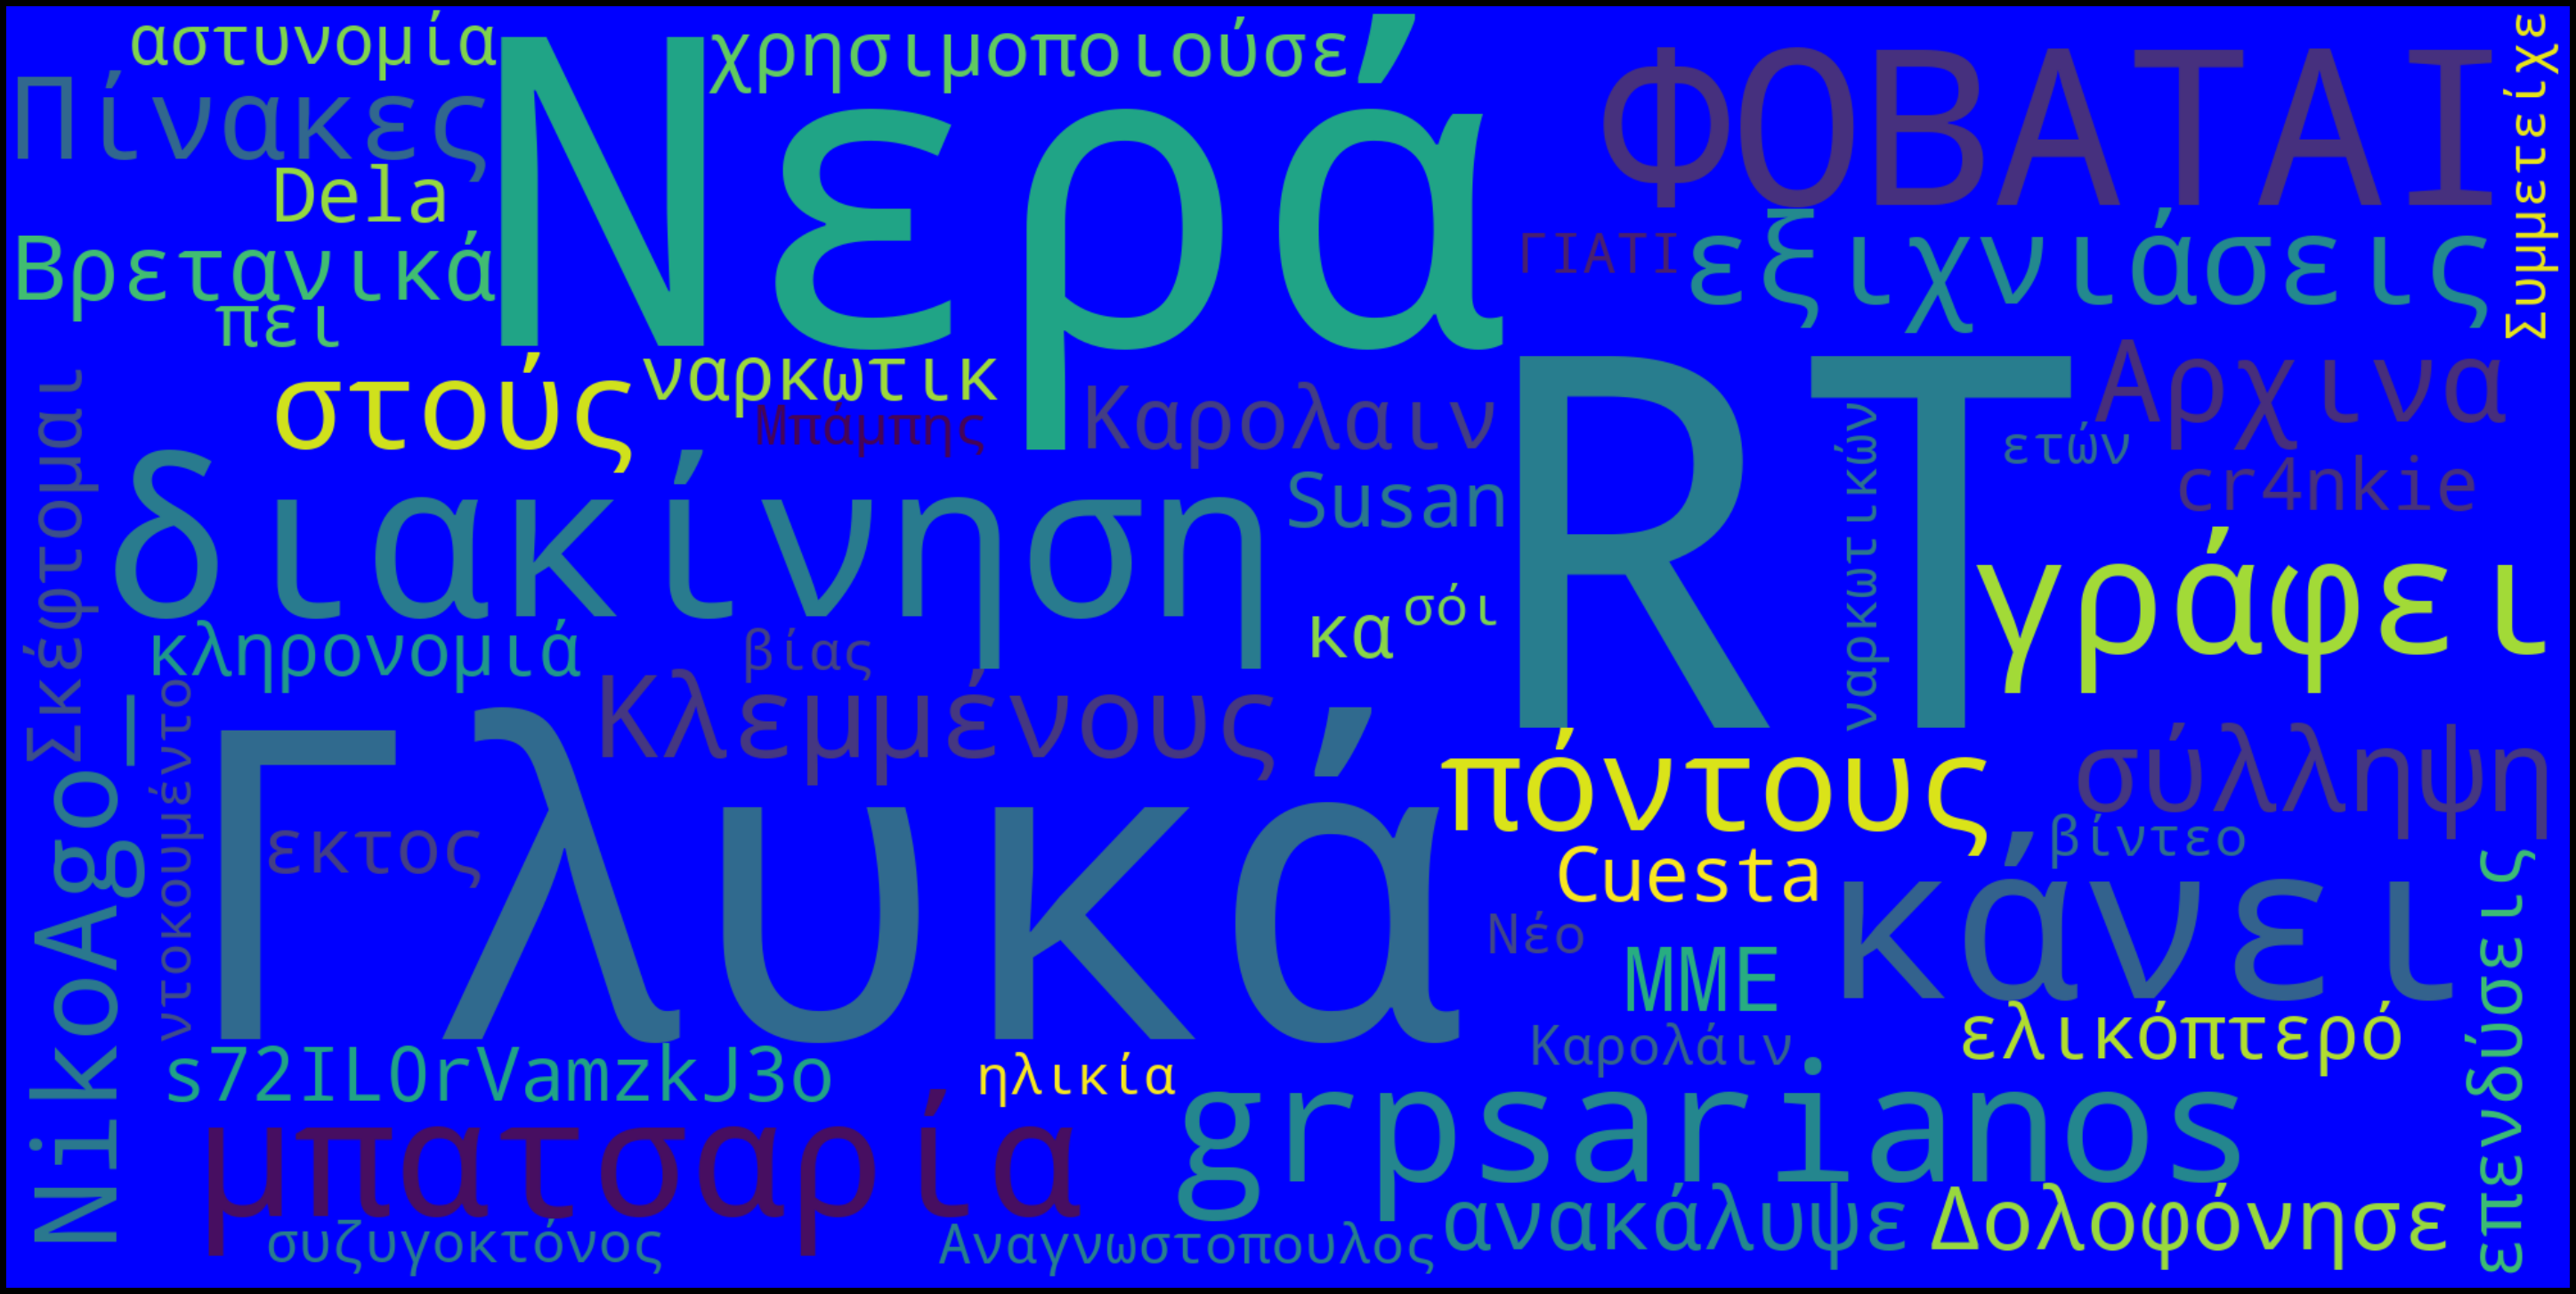

In [ ]:

wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#χρειαζεται φτιαξιμο γιατι δεν εχουμε εξαιρεσει τα αγγλικα stopwords

In [ ]:
list(STOPWORDS)[0:20]

['it',
 'once',
 'she',
 'your',
 'in',
 "she'd",
 'there',
 'shall',
 'because',
 'down',
 'off',
 "isn't",
 "they've",
 'but',
 'com',
 "let's",
 'the',
 'where',
 'herself',
 "you'll"]

In [ ]:

doc = nlp(short_tweets['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

RT rt
@NikoAgo @nikoago
_ _
: :
📌 📌
Βρετανικά βρετανικά
ΜΜΕ μμε
: :

 

« «
Δολοφόνησε δολοφόνησε
την την
# #
Καρολαιν καρολαιν
επειδή επειδή
μάλλον μάλλον
ανακάλυψε ανακάλυψε
ότι ότι
χρησιμοποιούσε χρησιμοποιώ
το το
ελικόπτερό ελικόπτερό
του του
για για
διακίνηση διακίνηση
ναρκωτικ ναρκωτικ
… …


In [ ]:

' '.join(token.lemma_ for token in doc)

'rt @nikoago _ : 📌 βρετανικά μμε : \n « δολοφόνησε την # καρολαιν επειδή μάλλον ανακάλυψε ότι χρησιμοποιώ το ελικόπτερό του για διακίνηση ναρκωτικ …'

In [ ]:
text

'RT @grpsarianos: Όσο η "μπατσαρία" γράφει πόντους με τις εξιχνιάσεις στα Γλυκά Νερά, στούς Κλεμμένους Πίνακες και με την σύλληψη τού Αρχινα… RT @NikoAgo_: 📌Βρετανικά ΜΜΕ:\n«Δολοφόνησε την #Καρολαιν επειδή μάλλον ανακάλυψε ότι χρησιμοποιούσε το ελικόπτερό του για διακίνηση ναρκωτικ… @s72IL0rVamzkJ3o ... Σκέφτομαι ότι, εκτος αν η κα Susan Dela Cuesta είχε κάνει κληρονομιά, ή κάνει επενδύσεις, το π…   RT @cr4nkie: τι θα πει "η αστυνομία ΦΟΒΑΤΑΙ" ότι ο συζυγοκτόνος Αναγνωστοπουλος Μπάμπης έκανε διακίνηση ναρκωτικών;; \nΓΙΑΤΙ ΦΟΒΑΤΑΙ, σόι το… Γλυκά Νερά: Νέο ντοκουμέντο με την Καρολάιν - Συμμετείχε σε βίντεο κατά της βίας - Σε ηλικία 13 ετών  '

In [ ]:
full_doc = nlp(text)

In [ ]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [ ]:
clear_text[200:400]

'καρολαιν επειδή μάλλον ανακάλυψε ότι χρησιμοποιώ το ελικόπτερό του για διακίνηση ναρκωτικ … @s72IL0rVamzkJ3o ... σκέφτομαι ότι , εκτος αν η κας susan dela cuesta έχω κάνω κληρονομιά , ή κάνω επενδύσει'

# Τελική εικόνα

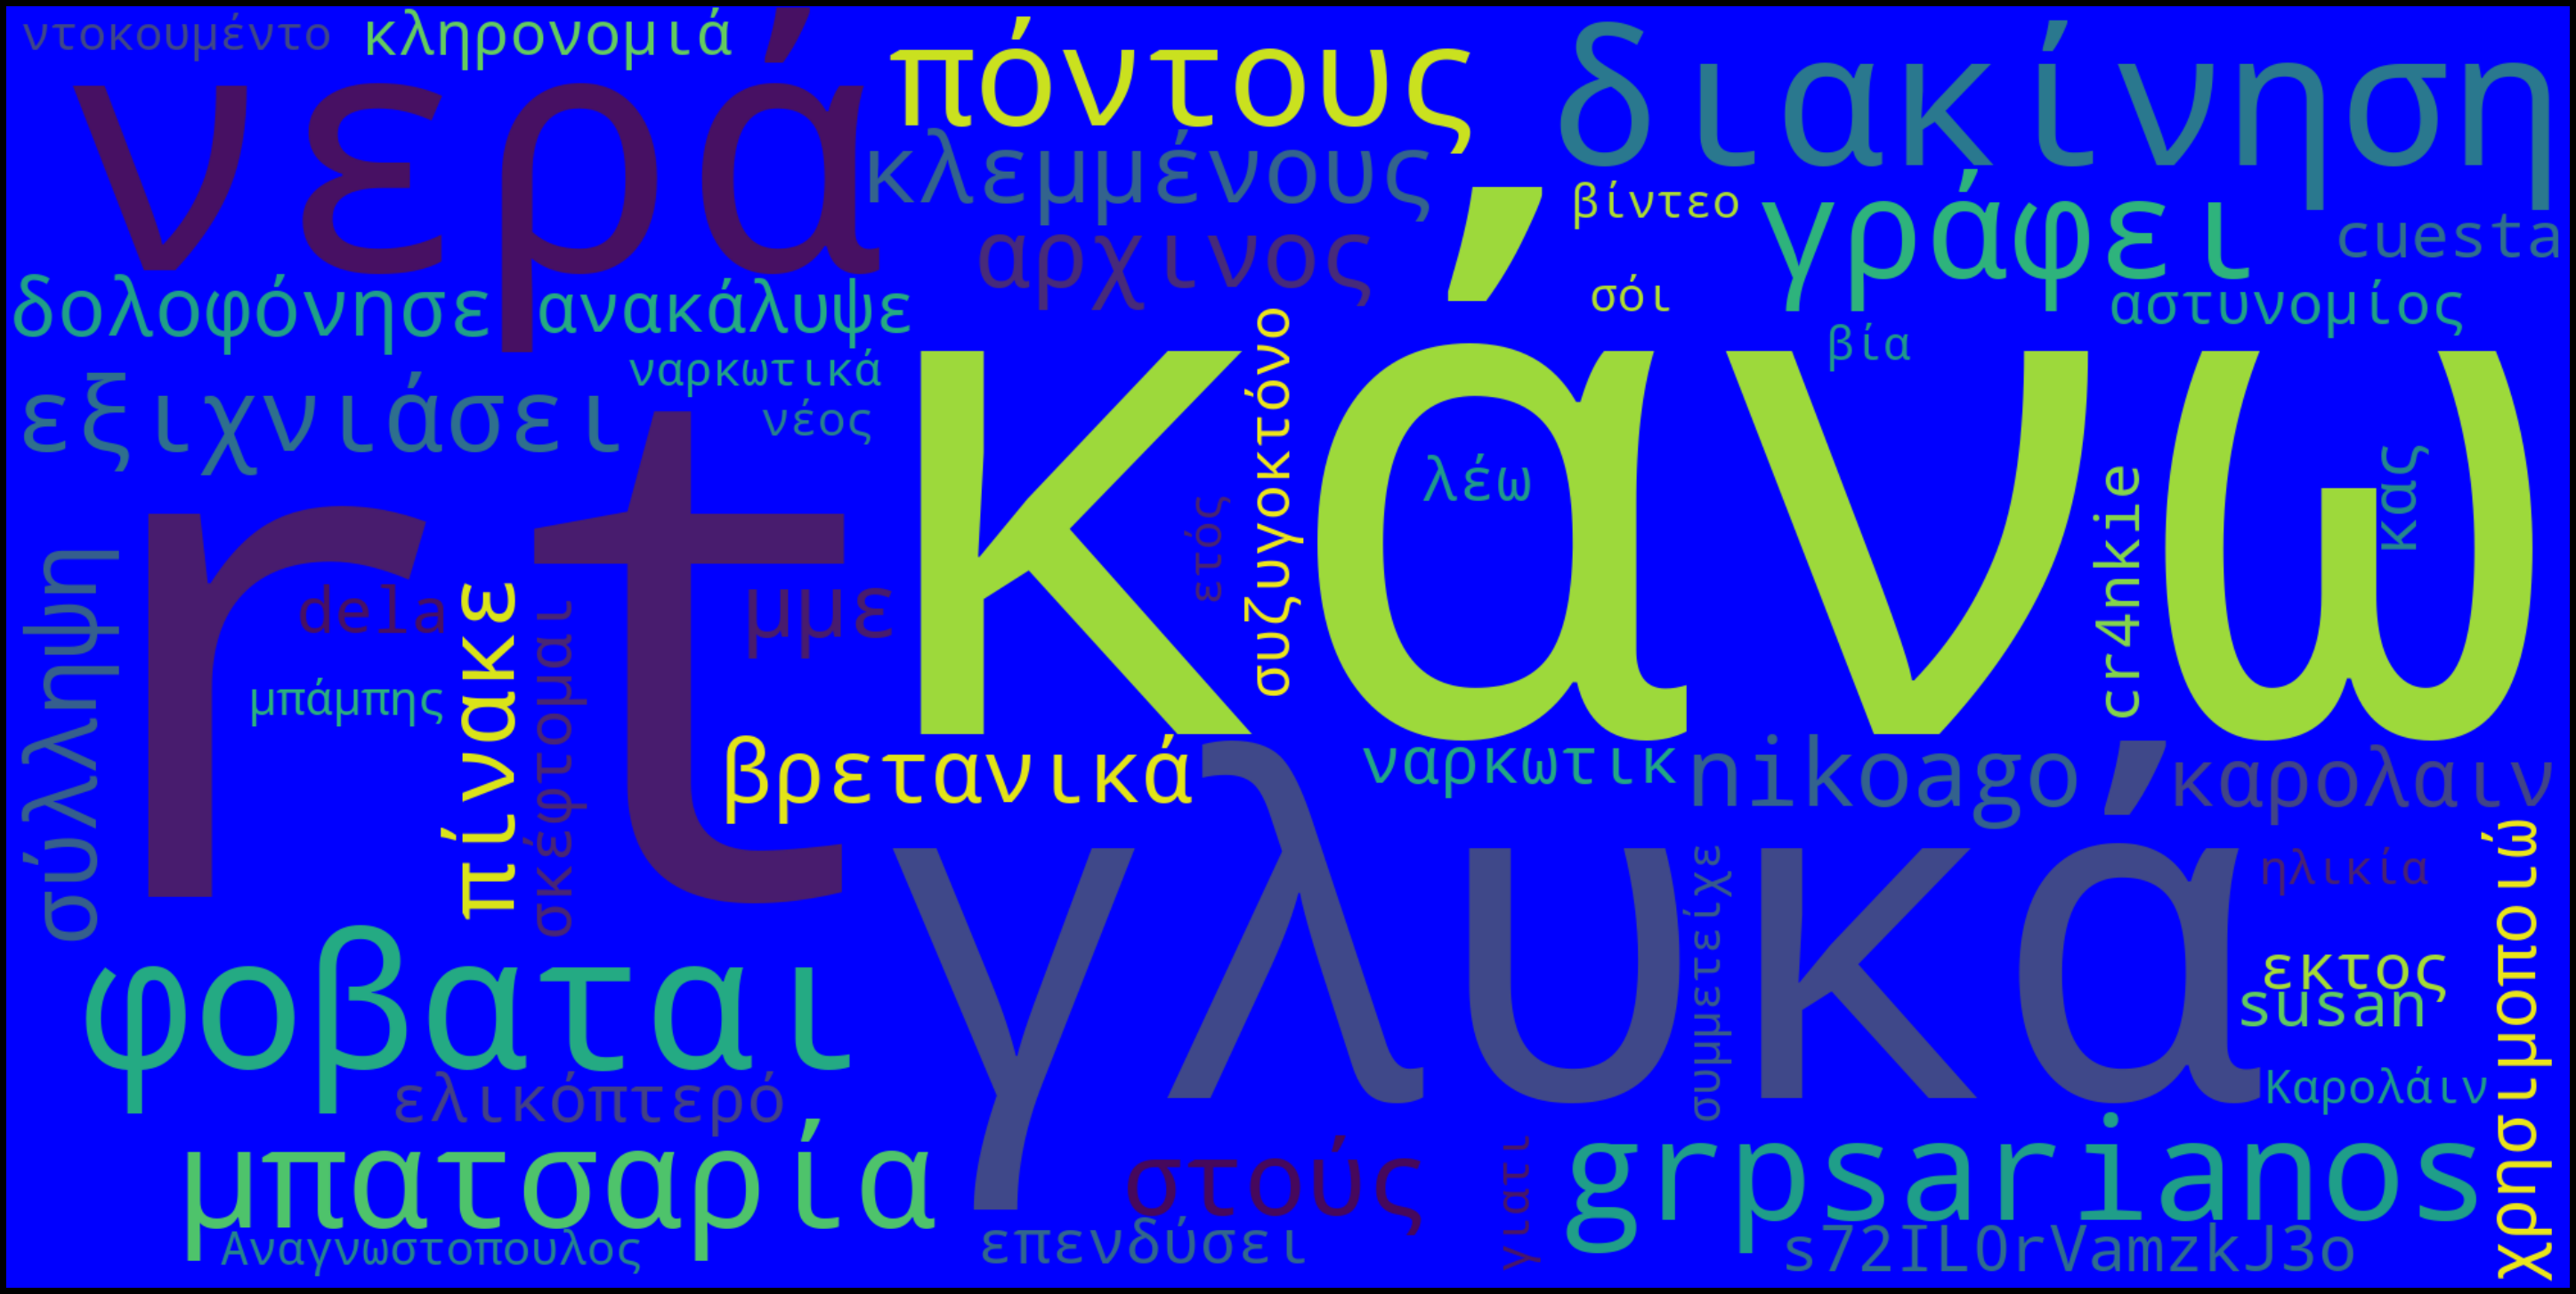

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#πιο συχνες λεξεις




In [ ]:
#Συχνες λεξεις

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])

In [ ]:

count_vector.shape

(5, 73)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,13,cr4nkie,cuesta,dela,grpsarianos,nikoago_,rt,s72il0rvamzkj3o,susan,έκανε,αν,αναγνωστοπουλος,ανακάλυψε,αρχινα,αστυνομία,βίας,βίντεο,βρετανικά,για,γιατι,γλυκά,γράφει,διακίνηση,δολοφόνησε,είχε,εκτος,ελικόπτερό,εξιχνιάσεις,επειδή,επενδύσεις,ετών,ηλικία,θα,κάνει,κα,και,καρολάιν,καρολαιν,κατά,κλεμμένους,κληρονομιά,μάλλον,με,μμε,μπάμπης,μπατσαρία,νέο,ναρκωτικ,ναρκωτικών,νερά,ντοκουμέντο,πίνακες,πει,πόντους,σε,σκέφτομαι,στα,στούς,συζυγοκτόνος,συμμετείχε,σόι,σύλληψη,την,της,τι,τις,το,του,τού,φοβαται,χρησιμοποιούσε,όσο,ότι
0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,2,0,0,1,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
2,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,2,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(short_tweets['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

,13,cr4nkie,cuesta,dela,grpsarianos,nikoago_,rt,s72il0rvamzkj3o,susan,αναγνωστοπουλος,ανακάλυψε,αρχινα,αστυνομία,βίας,βίντεο,βρετανικά,γιατι,γλυκά,γράφει,διακίνηση,δολοφόνησε,εκτος,ελικόπτερό,εξιχνιάσεις,επενδύσεις,ετών,ηλικία,κάνει,κα,καρολάιν,καρολαιν,κλεμμένους,κληρονομιά,μμε,μπάμπης,μπατσαρία,νέο,ναρκωτικ,ναρκωτικών,νερά,ντοκουμέντο,πίνακες,πει,πόντους,σκέφτομαι,στούς,συζυγοκτόνος,συμμετείχε,σόι,σύλληψη,φοβαται,χρησιμοποιούσε
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,2,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#######

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτά', 'εκάστα', 'εκάστο', 'ευθύ', 'εχτά', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποία', 'ποιέ', 'ποιώ', 'πολλός', 'προχθά', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τόσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


,...,@cr4nkie,@grpsarianos,@nikoago,@s72il0rvamzkj3o,cuesta,dela,susan,αναγνωστοπουλος,ανακάλυψε,αρχινος,αστυνομία,βία,βίντεο,βρετανικά,γιατι,γλυκά,γράφει,διακίνηση,δολοφόνησε,ελικόπτερό,εξιχνιάσει,επενδύσει,ετός,ηλικία,κάνω,καρολάιν,καρολαιν,κας,κλεμμένους,κληρονομιά,λέω,μμε,μπάμπη,μπατσαρία,νέος,ναρκωτικ,ναρκωτικά,νερά,ντοκουμέντο,πίνακε,πόντους,σκέφτομαι,στούς,συζυγοκτόνο,συμμετείχε,σόι,σύλληψη,φοβαται,χρησιμοποιώ
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,2,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,13,rt,γλυκά,διακίνηση,κάνει,κα,καρολάιν,καρολαιν,κλεμμένους,κληρονομιά,μμε,μπάμπης,μπατσαρία,νέο,νερά,ντοκουμέντο,πίνακες,πει,πόντους,φοβαται
0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2
4,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0


In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,13 ετών,γλυκά νερά,κα susan,καρολάιν συμμετείχε,καρολαιν ανακάλυψε,κλεμμένους πίνακες,κληρονομιά κάνει,μμε δολοφόνησε,μπάμπης διακίνηση,μπατσαρία γράφει,νέο ντοκουμέντο,ναρκωτικών γιατι,νερά νέο,νερά στούς,ντοκουμέντο καρολάιν,πίνακες σύλληψη,πει αστυνομία,πόντους εξιχνιάσεις,σκέφτομαι εκτος,στούς κλεμμένους
0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1
1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [ ]:
results.sum(axis =0).sort_values(ascending = False)

γλυκά νερά              2
στούς κλεμμένους        1
σκέφτομαι εκτος         1
κα susan                1
καρολάιν συμμετείχε     1
καρολαιν ανακάλυψε      1
κλεμμένους πίνακες      1
κληρονομιά κάνει        1
μμε δολοφόνησε          1
μπάμπης διακίνηση       1
μπατσαρία γράφει        1
νέο ντοκουμέντο         1
ναρκωτικών γιατι        1
νερά νέο                1
νερά στούς              1
ντοκουμέντο καρολάιν    1
πίνακες σύλληψη         1
πει αστυνομία           1
πόντους εξιχνιάσεις     1
13 ετών                 1
dtype: int64

In [ ]:

sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

γλυκά νερά             2
στούς κλεμμένους       1
σκέφτομαι εκτος        1
κα susan               1
καρολάιν συμμετείχε    1
dtype: int64

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

γλυκά νερά              2
στούς κλεμμένους        1
σκέφτομαι εκτος         1
κα susan                1
καρολάιν συμμετείχε     1
καρολαιν ανακάλυψε      1
κλεμμένους πίνακες      1
κληρονομιά κάνει        1
μμε δολοφόνησε          1
μπάμπης διακίνηση       1
μπατσαρία γράφει        1
νέο ντοκουμέντο         1
ναρκωτικών γιατι        1
νερά νέο                1
νερά στούς              1
ντοκουμέντο καρολάιν    1
πίνακες σύλληψη         1
πει αστυνομία           1
πόντους εξιχνιάσεις     1
13 ετών                 1
dtype: int64

In [ ]:

cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['γλυκά νερά ', 'στούς κλεμμένους']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(short_tweets['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

,γλυκά νερά,στούς κλεμμένους
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


7) Ποίες είναι οι 16 πιο συχνές λέξεις στα τουητς του Ελληνικού Netflix? (γραφιμα)


In [ ]:
sum_words.sort_values(ascending = False).head(17)

γλυκά νερά              2
στούς κλεμμένους        1
σκέφτομαι εκτος         1
κα susan                1
καρολάιν συμμετείχε     1
καρολαιν ανακάλυψε      1
κλεμμένους πίνακες      1
κληρονομιά κάνει        1
μμε δολοφόνησε          1
μπάμπης διακίνηση       1
μπατσαρία γράφει        1
νέο ντοκουμέντο         1
ναρκωτικών γιατι        1
νερά νέο                1
νερά στούς              1
ντοκουμέντο καρολάιν    1
πίνακες σύλληψη         1
dtype: int64

In [ ]:
most_common=sum_words.sort_values(ascending = False).head(16)

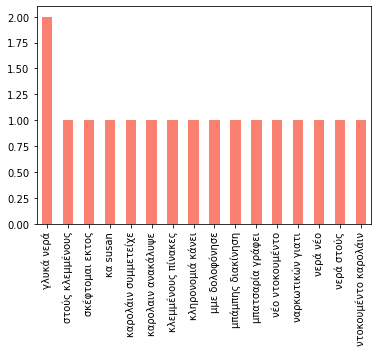

In [ ]:
most_common.plot(kind='bar',color='salmon')

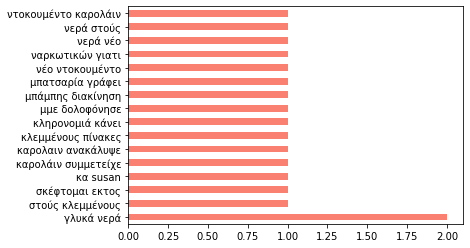

In [ ]:
most_common.plot(kind='barh',color='salmon')

In [ ]:
##################################

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_tweets['text'])

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

,13,cr4nkie,cuesta,dela,grpsarianos,nikoago_,rt,s72il0rvamzkj3o,susan,αναγνωστοπουλος,ανακάλυψε,αρχινα,αστυνομία,βίας,βίντεο,βρετανικά,γιατι,γλυκά,γράφει,διακίνηση,δολοφόνησε,εκτος,ελικόπτερό,εξιχνιάσεις,επενδύσεις,ετών,ηλικία,κάνει,κα,καρολάιν,καρολαιν,κλεμμένους,κληρονομιά,μμε,μπάμπης,μπατσαρία,νέο,ναρκωτικ,ναρκωτικών,νερά,ντοκουμέντο,πίνακες,πει,πόντους,σκέφτομαι,στούς,συζυγοκτόνος,συμμετείχε,σόι,σύλληψη,φοβαται,χρησιμοποιούσε
0,0.000000,0.000000,0.00000,0.00000,0.291726,0.000000,0.195372,0.00000,0.00000,0.000000,0.000000,0.291726,0.000000,0.000000,0.000000,0.000000,0.000000,0.235362,0.291726,0.000000,0.000000,0.00000,0.000000,0.291726,0.00000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.291726,0.00000,0.000000,0.000000,0.291726,0.000000,0.000000,0.000000,0.235362,0.000000,0.291726,0.000000,0.291726,0.00000,0.291726,0.000000,0.000000,0.000000,0.291726,0.000000,0.000000
1,0.000000,0.000000,0.00000,0.00000,0.000000,0.314667,0.210736,0.00000,0.00000,0.000000,0.314667,0.000000,0.000000,0.000000,0.000000,0.314667,0.000000,0.000000,0.000000,0.253872,0.314667,0.00000,0.314667,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,0.000000,0.314667,0.000000,0.00000,0.314667,0.000000,0.000000,0.000000,0.314667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.314667
2,0.000000,0.000000,0.27735,0.27735,0.000000,0.000000,0.000000,0.27735,0.27735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.27735,0.000000,0.000000,0.27735,0.000000,0.000000,0.5547,0.27735,0.000000,0.000000,0.000000,0.27735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.27735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.266317,0.00000,0.00000,0.000000,0.000000,0.178356,0.00000,0.00000,0.266317,0.000000,0.000000,0.266317,0.000000,0.000000,0.000000,0.266317,0.000000,0.000000,0.214863,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.266317,0.000000,0.000000,0.000000,0.266317,0.000000,0.000000,0.000000,0.266317,0.000000,0.00000,0.000000,0.266317,0.000000,0.266317,0.000000,0.532634,0.000000
4,0.311561,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.311561,0.311561,0.000000,0.000000,0.251365,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.311561,0.311561,0.0000,0.00000,0.311561,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.311561,0.000000,0.000000,0.251365,0.311561,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.311561,0.000000,0.000000,0.000000,0.000000


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.041172   0.         0.03484573 0.11832389]]


In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.041172   0.         0.03484573 0.11832389]
 [0.041172   1.         0.         0.09213365 0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.03484573 0.09213365 0.         1.         0.        ]
 [0.11832389 0.         0.         0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

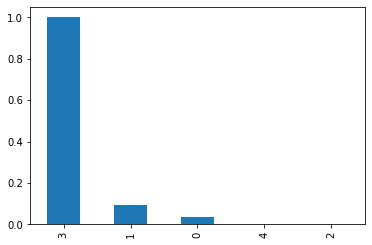

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
short_tweets['text'].loc[3]

'RT @cr4nkie: τι θα πει "η αστυνομία ΦΟΒΑΤΑΙ" ότι ο συζυγοκτόνος Αναγνωστοπουλος Μπάμπης έκανε διακίνηση ναρκωτικών;; \nΓΙΑΤΙ ΦΟΒΑΤΑΙ, σόι το…'

# SENTIMENT ANALYSIS

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:

full_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/glykanera_search.tsv", sep='\t')

In [ ]:
len(full_tweets_df)

3657

In [ ]:
short_tweets.tail()

,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
2562,2017-12-12 11:58:19,@ChristinaHalkia Παντρέψου με.,0,0,0,0,0,0,0,0,0,0
2563,2017-12-12 11:45:04,@Maryhlis,0,0,0,0,0,0,0,0,0,0
2564,2017-12-12 11:44:20,@hazardelm Έδεσε.,0,0,0,0,0,0,0,0,0,0
2565,2017-12-12 11:43:39,@adiasistos Ευτυχώς στον Pablo και την παρέα τ...,0,1,1,0,0,0,0,0,0,0
2566,2017-12-12 06:35:18,"Ναι, καλά βλέπεις.",0,1,0,0,0,0,0,0,0,0


In [ ]:
short_tweets.dtypes

date            datetime64[ns]
text                    object
anger                    int64
positivity               int64
joy                      int64
disgust                  int64
surprise                 int64
trust                    int64
anticipation             int64
sadness                  int64
negative                 int64
fear                     int64
dtype: object

In [ ]:

short_tweets['date'] = pd.to_datetime(short_tweets['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [ ]:

short_tweets.dtypes

date            datetime64[ns]
text                    object
anger                    int64
positivity               int64
joy                      int64
disgust                  int64
surprise                 int64
trust                    int64
anticipation             int64
sadness                  int64
negative                 int64
fear                     int64
dtype: object

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
short_tweets['text'] = short_tweets['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [ ]:
short_tweets.head()

,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2021-06-05 19:00:00,Τι μέρα έχουμε;,0,0,0,0,0,0,0,0,0,0
1,2021-06-03 07:36:40,Με σκεφτόσουν όλη μέρα;,0,0,0,0,0,0,0,0,0,0
2,2021-06-02 14:10:00,Ο Μάικλ Ντάγκλας έρχεται στην τελευταία σεζόν ...,0,0,0,0,0,0,0,0,0,0
3,2021-06-01 14:30:00,Καλό μήνα 🌞 Δείτε πως θα πάει 👇🏼,0,0,0,0,0,0,0,0,0,0
4,2021-05-31 12:30:00,Τώρα ξεκινάει ο πραγματικός πόνος🐍,0,1,0,1,0,2,0,1,2,1


In [ ]:
short_tweets.head()

,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2021-06-05 19:00:00,Τι μέρα έχουμε;,0,0,0,0,0,0,0,0,0,0
1,2021-06-03 07:36:40,Με σκεφτόσουν όλη μέρα;,0,0,0,0,0,0,0,0,0,0
2,2021-06-02 14:10:00,Ο Μάικλ Ντάγκλας έρχεται στην τελευταία σεζόν ...,0,0,0,0,0,0,0,0,0,0
3,2021-06-01 14:30:00,Καλό μήνα 🌞 Δείτε πως θα πάει 👇🏼,0,0,0,0,0,0,0,0,0,0
4,2021-05-31 12:30:00,Τώρα ξεκινάει ο πραγματικός πόνος🐍,0,1,0,1,0,2,0,1,2,1


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#                strip_accents = 'unicode', 
#                token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#                stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,αυτοκινητοδρομος,αυγουστος,βερολινο,βικτωρια,βοστωνη,γαμηλιο ταξιδι,γεννηση παιδιου,γαιδαρος,γατα,γερμανος,γιαννης,γνωστοποιηση,γυαλια,διακοπη,διευθυντρια σχολειου,διδυμοι,δεξαμενη,δευτερα παρουσια,δευτερον,δημοκρατια,διαρκεια ζωης,διαδρομη,διαλογισμος,διεθνες,διευθυνσεις,δραμα,εξαρτηση,εξωτερικου χωρου,επικοινωνω,επιπτωσεις,...,καρυδια,ωχρος,ελλειπων,προϊοντα,δικαιολογημενο,ενταλματα,κρεατοελλια,αποτυχημενος,σπαταλω,τροποι,ξεπερασμενο,αδιαβροχος,παντρευομαι,βοτανισμα,χωρις βαρος,παραξενα,καλωσορισατε,κρασπεδο,χελωνι,ηχηρο κτυπημα,απολυτως,πλατυς,ανθρωπινο ον,ανεξελεγκτη πυρκαγια,απροσδοκητα ευρημα,μαραμενο,αλιμονο,επιδεινωνεται,αποσπω βιαια,καρπος του χεριου,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(2567, 13161)

In [ ]:
emolex_df.head()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

,index,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,13104,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,13106,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,13110,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,13138,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:

short_tweets.head(3)

,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2021-06-05 19:00:00,Τι μέρα έχουμε;,0,0,0,0,0,0,0,0,0,0
1,2021-06-03 07:36:40,Με σκεφτόσουν όλη μέρα;,0,0,0,0,0,0,0,0,0,0
2,2021-06-02 14:10:00,Ο Μάικλ Ντάγκλας έρχεται στην τελευταία σεζόν ...,0,0,0,0,0,0,0,0,0,0


In [ ]:
short_tweets['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets['disgust'] = wordcount_df[disgust_words].sum(axis=1)



short_tweets['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_tweets

,date,text,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2021-06-05 19:00:00,Τι μέρα έχουμε;,0,0,0,0,0,0,0,0,0,0
1,2021-06-03 07:36:40,Με σκεφτόσουν όλη μέρα;,0,0,0,0,0,0,0,0,0,0
2,2021-06-02 14:10:00,Ο Μάικλ Ντάγκλας έρχεται στην τελευταία σεζόν ...,0,0,0,0,0,0,0,0,0,0
3,2021-06-01 14:30:00,Καλό μήνα 🌞 Δείτε πως θα πάει 👇🏼,0,0,0,0,0,0,0,0,0,0
4,2021-05-31 12:30:00,Τώρα ξεκινάει ο πραγματικός πόνος🐍,0,1,0,1,0,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2562,2017-12-12 11:58:19,@ChristinaHalkia Παντρέψου με.,0,0,0,0,0,0,0,0,0,0
2563,2017-12-12 11:45:04,@Maryhlis,0,0,0,0,0,0,0,0,0,0
2564,2017-12-12 11:44:20,@hazardelm Έδεσε.,0,0,0,0,0,0,0,0,0,0
2565,2017-12-12 11:43:39,@adiasistos Ευτυχώς στον Pablo και την παρέα τ...,0,1,1,0,0,0,0,0,0,0


In [ ]:
short_tweets.set_index('date', inplace=True)

KeyError: ignored

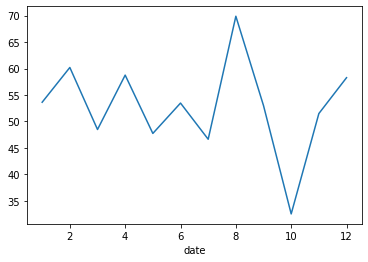

In [ ]:
short_tweets['text'].str.len().groupby(by=short_tweets.index.month).mean().plot()

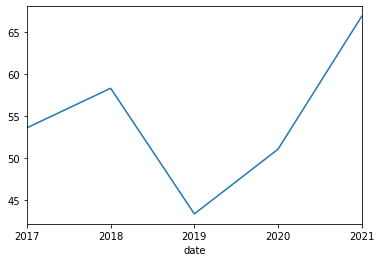

In [ ]:
short_tweets['text'].str.len().resample('A').mean().plot()

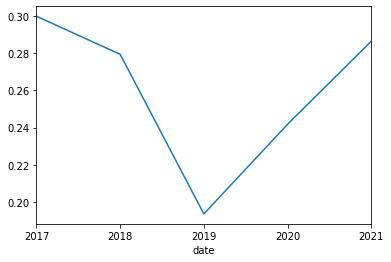

In [ ]:
short_tweets['positivity'].resample('A').mean().plot()

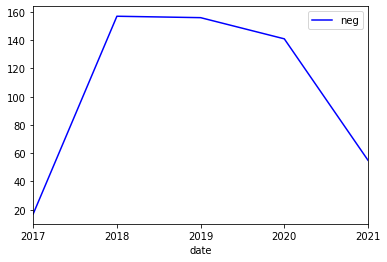

In [ ]:

short_tweets['negative'].resample('A').sum().plot(color = 'b',label = 'neg').legend()

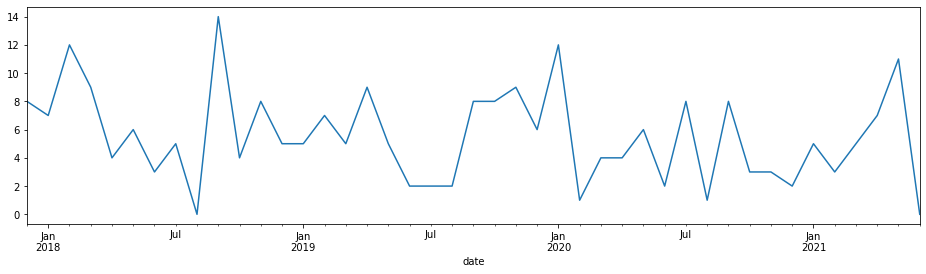

In [ ]:
short_tweets['anger'].resample('M').sum().plot(figsize=(16,4))

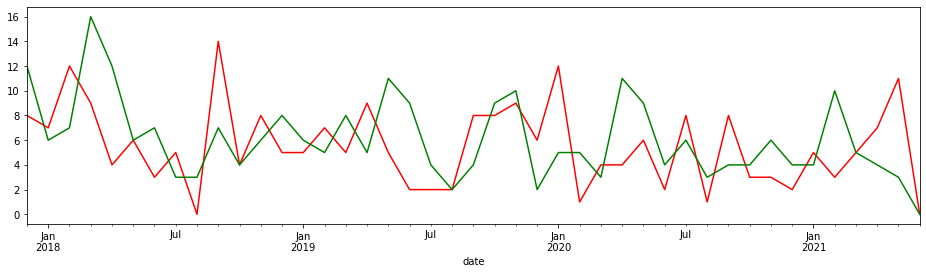

In [ ]:
ax = short_tweets['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')

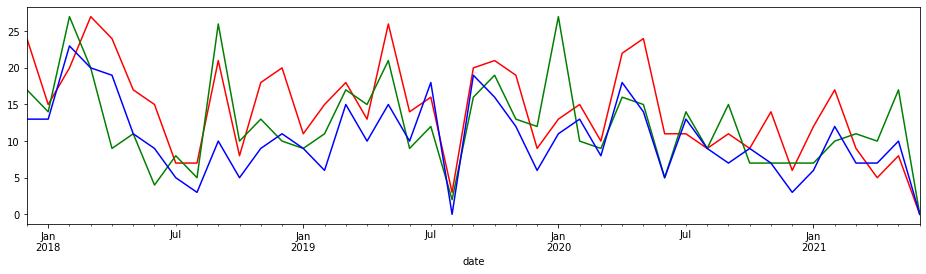

In [ ]:
ax = short_tweets['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

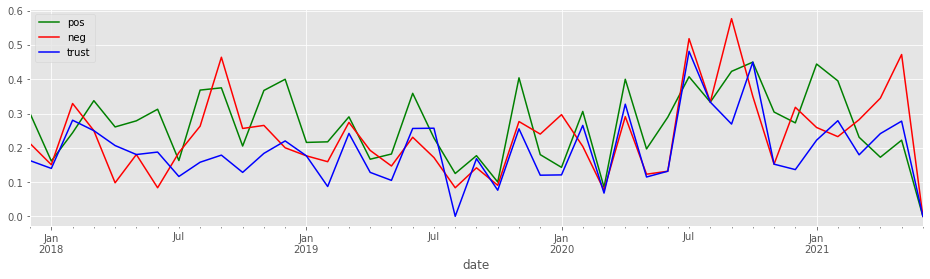

In [ ]:
ax = short_tweets['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

In [ ]:
import matplotlib.pyplot as plt

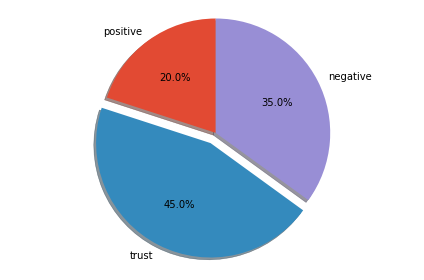

In [ ]:
# Pie chart
labels = ['positive', 'trust', 'negative']
sizes = [20, 45, 35]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()